In [63]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, roc_curve, auc

In [ ]:
data = pd.read_csv("/home/ghost/dataSets/heart.csv")   #Imports the dataset
print(data.describe(include=[object]).T) #Describes object variables in the dataset

print("******************************************************************")

print(data.describe().T)   #Describes numeric variables in the dataset

In [ ]:
print(data.head(6)) #Displays first 6 raws of the dataset

In [ ]:
print(data.info())   #additional information about the dataset

In [ ]:
data_encoded = pd.get_dummies(data) 
data_encoded = pd.get_dummies(data_encoded, columns = ["FastingBS"])  #Converts cathegorical data to bool variables
print(data_encoded.info())

In [41]:
x = data_encoded.drop("HeartDisease", axis = 1)
y = data_encoded["HeartDisease"]   #Splits features and target

In [ ]:
plt.figure(figsize=(20, 16))
sns.heatmap(data_encoded.corr(), annot = True, cmap = "coolwarm",linewidths = 1) #Draws a heatmap for showing correlations
plt.show()

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   # Train and test splitting

In [66]:
# Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [90]:
#Hyperparameter tuning for best model
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10]
}

param_grid_svc = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}

In [86]:
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv = 5, n_jobs= -1, scoring="accuracy")
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [91]:
svc = SVC(probability = True, random_state=42)
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv =5, n_jobs=-1, scoring="accuracy")
grid_search_svc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [94]:
#best model
best_model = grid_search_rf.best_estimator_ if grid_search_rf.best_score_ > grid_search_svc.best_score_ else grid_search_svc.best_score_

# Training the best model
best_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [101]:
# Predictions
y_pred = best_model.predict(x_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best Model Is:", best_model)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Best Model Is: RandomForestClassifier(n_estimators=300, random_state=42)
Accuracy: 0.875
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



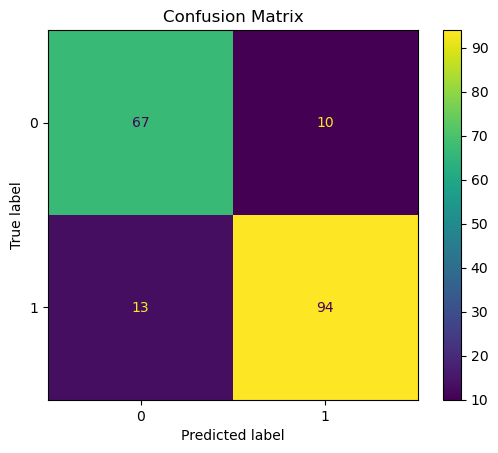

In [104]:
# Confusion Matrix

ConfusionMatrixDisplay.from_estimator(best_model, x_test, y_test)
plt.title("Confusion Matrix")
plt.show()


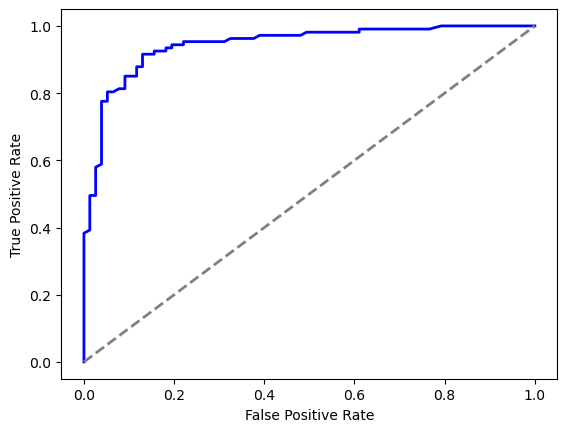

In [110]:
# ROC Curve
y_prob = best_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = "blue", lw = 2)
plt.plot([0,1], [0,1], color = "gray", lw = 2, linestyle = "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
